In [1]:
import pandas as pd

In [2]:
# Specifying the file path
file_path = "reviews.csv"

# Loading the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Displaying the DataFrame
df.head()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo


In [3]:
# Storing the 'content' column in the 'content' variable

content = df['content']

In [4]:
content.head()

0    I have the same recurring tasks to do every da...
1    Instead of shopping around, I downloaded Any.d...
2    Why does every once in a while... out of the b...
3    Terrible Update! This app used to be perfect f...
4    This app is deceivingly terrible. There are so...
Name: content, dtype: object

## Converting to lowercase

In [5]:
# Defining the function to convert text to lowercase
def to_lowercase(text_series):
    return text_series.str.lower()

# Applying the function to the content
content = to_lowercase(content)


## Removing Links

In [6]:
import re
# Using re module
# Defining a function to remove links 
def remove_links(text):
    url_pattern = r'https?://\S+|www\.\S+'              # Defining the regular expression pattern that matches with URLs
    return re.sub(url_pattern, '', text)                # Substituting the URLs with an empty string


content = content.fillna('').astype(str).apply(remove_links)                   # Applying the remove_links function to the 'content'


## Remove next lines

In [7]:
# Defining the function to replace newline characters
def remove_newlines(text_series):
    return text_series.str.replace(r'\n', '', regex=True)      # Replacing newline characters with an empty string

# Applying the function to the content
content= remove_newlines(content)


## Removing words containing numbers

In [8]:
# Defining the function to remove words containing digits
def remove_words_with_digits(text_series):
    return text_series.apply(lambda x: re.sub(r'\b\w*\d\w*\b', '', x))
# The regular expression r'\b\w*\d\w*\b' matches words that contain at least one digit within them.
# These are replaced with an empty string

# Applying the function to the content
content = remove_words_with_digits(content)


## Removing extra spaces

In [9]:
# Defining a function to remove extra spaces
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip() 
# The regular expression pattern r'\s+' matches with whitespace characters
# These are replaced with an empty string

# Applying the remove_extra_spaces function to the content 
content = content.apply(remove_extra_spaces)


## Removing Special Characters

In [10]:
# Defining the function to remove special characters
def remove_special_characters(text_series):
    return text_series.apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
# The regular expression r'[^a-zA-Z0-9\s]' matches any character that is not a letter 
# These are replaced with an empty string

# Applying the function to the content
content = remove_special_characters(content)


## Removal of Stop words

In [11]:
import nltk
from nltk.corpus import stopwords

# nltk.download('stopwords')                                # Downloading the stopwords corpus

# Defining the function to remove stopwords
def remove_stopwords(text_series):
    stop_words = set(stopwords.words('english'))
    return text_series.apply(
        lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
    )
# iterating over each word in the text (x.split())
# keeping only those words that are not in the set of stop words (word.lower() not in stop_words)

# Applying the function to the content
content = remove_stopwords(content)


## Stemming

In [12]:
from nltk.stem import PorterStemmer

# nltk.download('punkt')                                    # Downloading NLTK resources

# Defining the function to apply stemming
def apply_stemming(text_series):
    porter = PorterStemmer()                                # initializing a PorterStemmer object
    return text_series.apply(
        lambda x: ' '.join([porter.stem(word) for word in x.split()])
    )
# iterating over each word in the text (x.split()), applying stemming using porter.stem(word)

# Applying the function to the content
content = apply_stemming(content)



## Lemmatization

In [13]:
from nltk.stem import WordNetLemmatizer

# nltk.download('punkt')                                     # Downloading NLTK resources
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Defining the function to apply lemmatization
def apply_lemmatization(text_series):
    lemmatizer = WordNetLemmatizer()  # initializing a WordNetLemmatizer object
    return text_series.apply(
        lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)])
    )
# iterating over each word in the text (x.split()), applying lemmatization using lemmatizer.lemmatize(word).

# Apply the function to the content
content = apply_lemmatization(content)


## Data after preprocessing

In [14]:
content.head()

0    recur task everi day need todolist remind buzz...
1    instead shop around download anydo wide use se...
2    everi blue app ask updat acct email everyth ta...
3    terribl updat app use perfect plan certain tas...
4    app deceivingli terribl realli nice design fea...
Name: content, dtype: object

## Word Cloud

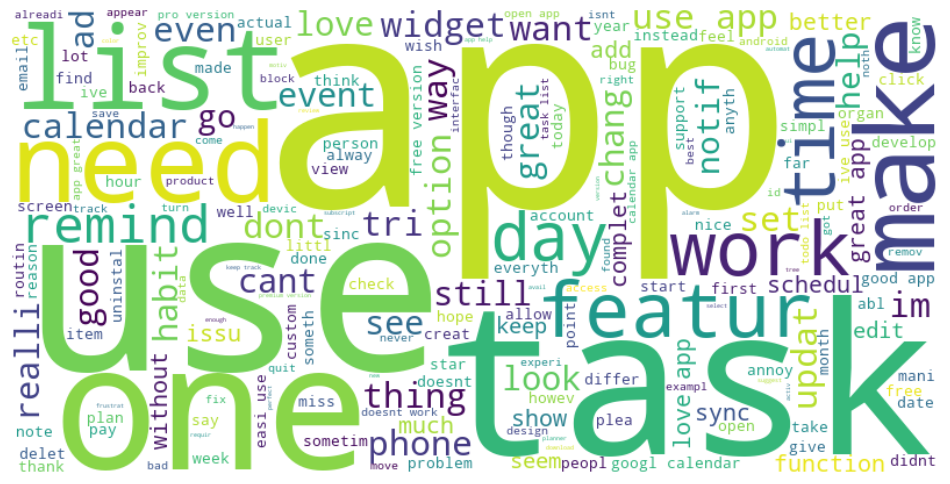

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenating all text data into a single string
text = ' '.join([str(text) for text in content])

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Displaying the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Plotting

### Word Frequency Histogram:

Plotting a histogram of word frequencies to visualize the distribution of word occurrences in the text data.

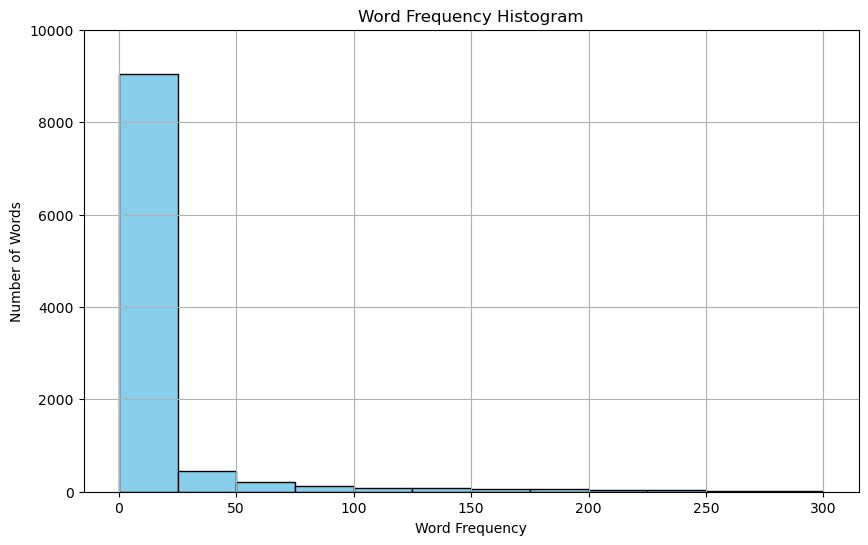

In [16]:
from collections import Counter

# Tokenizing the preprocessed text
tokens = ' '.join(content).split()  

# Calculating word frequencies
word_freq = Counter(tokens)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(word_freq.values(), bins=range(0, 301, 25), color='skyblue', edgecolor='black')
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.title('Word Frequency Histogram')
plt.grid(True)

# Setting the y-axis limits
plt.ylim(0, 10000)                                   # Adjusting the upper limit as needed

plt.show()


### Top N Most Common Words

Plotting a bar chart showing the top N most common words in the text data.
It visualizes the frequency of the most frequently occurring words in the text data


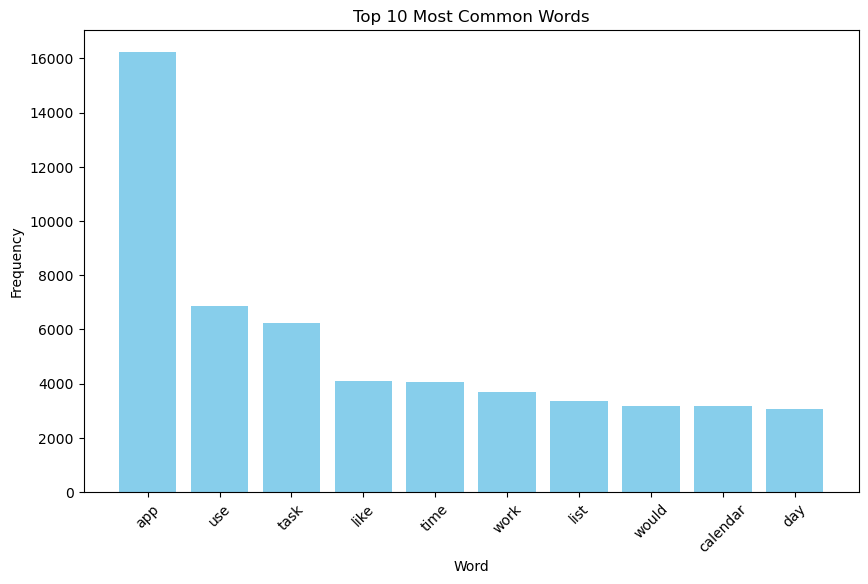

In [17]:
from collections import Counter

# Tokenizing the preprocessed text
tokens = ' '.join(content).split()  

# Calculating word frequencies
word_freq = Counter(tokens)

# Getting the top N most common words
top_n_words = word_freq.most_common(10)  # We can change 10 to any desired number of words

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_n_words], [word[1] for word in top_n_words], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()